# Overfitting I
​
Major parts of this lecture are borrowed from the discussion of [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) Jake VanderPlas's excellent online book, the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html). 
​
In the last lecture, we saw that a reasonably simple decision tree was able to achieve almost 80\% accuracy in modeling from demographic data whether or not a given passenger survived the Titanic. However, we shouldn't take this result at face value. To see why, let's take a look at an example, in the context of regression (i.e. predicting a quantitative variable). 

In [1]:
#standard imports
import numpy as np
from matplotlib import pyplot as plt

Let's generate some random data of the form y=log(x) plus a random error.

First we seed the generator.

In [2]:
np.random.seed(1234)

Now, lets make the data, where X is ten randomly chosen points between 0 and 1 

In [3]:
X=np.random.rand(10)
y=np.log(X)+.1*np.random.randn(len(X))

Let's take a look

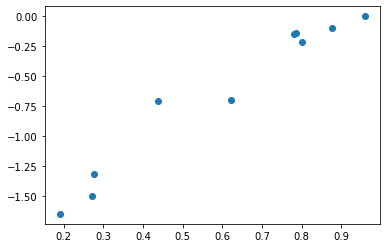

In [4]:
fig, ax=plt.subplots(1)
ax.scatter(X,y)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

The return value of `PolynomialRegression()` is a model, which we can then fit. There is an unfortunate syntactic requirement here -- we need to transform `X`, which is currently a 1d array, into a 2d array in which the second dimension has length 1.   

In [6]:
X=X[:,None]
X.shape

(10, 1)

In [9]:
model1=PolynomialRegression(1).fit(X,y)
model2=PolynomialRegression(10).fit(X,y)


That's it for model fitting! Let's check quantitatively how we did: 

In [10]:
model1.score(X,y), model2.score(X,y)

(0.9525931944971778, 1.0)

The way that the score is computed depends on the model, but for this class of models the highest possible value of the score is 1. So, `model2` achieves essentially a perfect score, whereas `model1` achieves a noticeably lower score. 

Let's visualize to see how `model2` achieved such an impressive score. 

[(-1.751196269749546, 0.9977832927023982)]

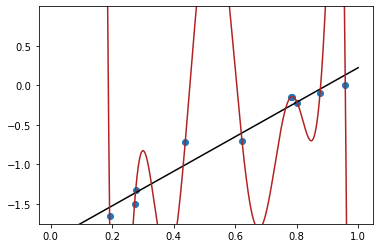

In [12]:
fig,ax=plt.subplots(1)
xfit=np.linspace(.01,1,1000)[:,None]

ax.plot(xfit,model1.predict(xfit),color="black")
ax.plot(xfit,model2.predict(xfit),color="firebrick")
ax.scatter(X[:,0],y)

ax.set(ylim=(y.min()-.1,y.max()+1))

The curvey red line perfectly fits the data! Machine learning is easy.

But... does this make any sense???? The red squiggle looks nothing like a logarithm

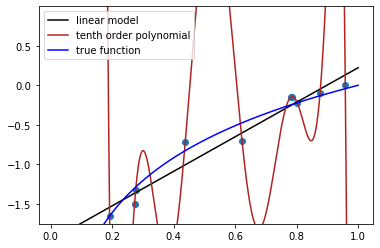

In [14]:
fig,ax=plt.subplots(1)
xfit=np.linspace(.01,1,1000)[:,None]

ax.plot(xfit,model1.predict(xfit),color="black",label="linear model")
ax.plot(xfit,model2.predict(xfit),color="firebrick",label="tenth order polynomial")
ax.plot(xfit,np.log(xfit),color="blue",label="true function")
ax.scatter(X[:,0],y)

ax.set(ylim=(y.min()-.1,y.max()+1))
ax.legend()

As we can see, the red line is __great__ at 10 select points, but __terrible__ everywhere else

Now, let's look at how the models perform on unseen data from a computational prespective

In [15]:
#new data
X_new=np.random.rand(10)
y_new=np.log(X_new)+.1*np.random.randn(len(X_new))
X_new=X_new[:,None]

In [16]:
#newscores
model1.score(X_new,y_new),model2.score(X_new,y_new)

(0.8096821682305582, -70179.9679504746)

Woops! This time, `model1`'s score is similar to what it achieved previously, but `model2`'s score is actually negative-very negative. The useless model that just guesses `0` for each prediction would have yielded a score of `0`, so `model2` is literally worse than useless. We can see this when we visualize: `model2` perfectly fits the original points, but is often badly off on the new ones. In contrast, `model1` is pretty close. 


## Overfitting

*Overfitting* refers to the phenomenon in which a machine learning model fits the *random noise* in the data, rather than the *true signal*. A characteristic sign of overfitting is that the model performs much less well on unseen data than on the data to which it was fit. In our case, we would say that `model2` is badly overfit -- it focused so much on the random wiggles in the data that it completely missed the overall upward trend. As a result, it cannot be used for prediction. In contrast, `model1` did ok -- it missed the fact that the true signal in the data is curved, but it can still be used to generate fairly reasonable predictions. 

Another aspect of overfitting is *model flexibility*. The less flexible `model1` didn't have enough flexibility to fit the curved pattern of the data, but it also didn't have enough flexibility to get distracted by the random noise. In contrast, the more flexible `model2` had so much flexibility that it was able to perfectly fit the noise in the data. This interpretation suggests that we should seek models with intermediate degrees of flexibility. In the next lecture, we'll discuss how to use model validation techniques to do this, and thereby diagnose and avoid overfitting. 